# Problem 1
(a)
**FALSE.**
While the ID3 algorithm can produce suboptimal decision trees, it is not always the case. The algorithm uses a greedy approach by selecting the attribute that maximizes information gain at each node, which may lead to suboptimal splits but not necessarily always.

(b)
**FALSE.**
Decision tree nodes can have more than two children, particularly in multi-class classification or when dealing with features with more than two possible values.

(c)
**TRUE.**
The ID3 algorithm selects the feature that maximizes the information gain, which is equivalent to minimizing the entropy or maximizing the mutual information between the feature and the label.

(d)
**FALSE.**
Nearest neighbor classifiers can handle categorical features by appropriately defining a distance metric that accounts for the categorical nature of the data.

(e)
**FALSE.**
A k-NN classifier is less likely to overfit for larger values of k because it smooths the decision boundaries by considering more neighbors.

(f)
**TRUE.*
With k = 1 and ℓ2 distance metric, the nearest neighbor classifier essentially classifies based on the closest point, which results in a linear decision boundary between the two classes.

(g)
**FALSE.**
Training k-NN classifiers involves storing the entire training dataset in memory for efficient retrieval during classification.

(h)
**TRUE.**
When k is set to the number of samples in the training data, the k-NN classifier outputs the majority class among the training samples since it considers all samples as nearest neighbors.

(i)
**FALSE.**
Deep decision trees are more likely to overfit as they can capture intricate patterns in the training data, leading to poor generalization on unseen data.

(j)
**TRUE.**
A regularized solution penalizes large weights, often leading to a higher empirical training loss compared to an unregularized model. This is because the model prioritizes a balance between fitting the data and keeping the weights small.

(k)

i. **FALSE.**
If the classifier has high accuracy on training data but low accuracy on test data, it's more likely overfitting than underfitting.

ii. **TRUE.**
A model with high accuracy on training data but lower accuracy on test data suggests overfitting, which could be mitigated by regularization techniques. If the model hasn't been regularized, it might generalize poorly to unseen data.

iii. **TRUE.**
Differences in the distribution of training and test datasets can lead to poor generalization. Overfitting may not be the sole cause; rather, the model might fail to capture the underlying patterns present in the test data.

iv. **FALSE.**
Having too many samples generally reduces overfitting rather than causing it. Overfitting is more likely due to model complexity or lack of regularization.

# Problem 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text

data = pd.DataFrame({
    'V': [0, 0, 1, 1, 1],
    'W': [0, 1, 0, 1, 1],
    'X': [0, 0, 0, 0, 1],
    'Y': [0, 1, 1, 0, 0]
})

X = data[['V', 'W', 'X']]
y = data['Y']

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X, y)

tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
tree_rules

'|--- X <= 0.50\n|   |--- W <= 0.50\n|   |   |--- V <= 0.50\n|   |   |   |--- class: 0\n|   |   |--- V >  0.50\n|   |   |   |--- class: 1\n|   |--- W >  0.50\n|   |   |--- V <= 0.50\n|   |   |   |--- class: 1\n|   |   |--- V >  0.50\n|   |   |   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n'

Part (a)

```markdown
X <= 0.5
  |--- W <= 0.5
    |--- V <= 0.5
      |--- class: 0
    |--- V >  0.5
      |--- class: 1
  |--- W >  0.5
    |--- V <= 0.5
      |--- class: 1
    |--- V >  0.5
      |--- class: 0
X > 0.5
  |--- class: 0
```

Since ID3 builds a tree that perfectly fits the data unless stopped by a pruning mechanism, the training error of this classifier is 0. Each leaf node correctly classifies the training examples that reach it.

Part (b)

```markdown
1. Using only 'V': 
     |--- V <= 0.50
     |   |--- class: 0
     |--- V >  0.50
     |   |--- class: 0
   - Training Accuracy: 60%

2. Using only 'W': 
     |--- W <= 0.50
     |   |--- class: 0
     |--- W >  0.50
     |   |--- class: 0
   - Training Accuracy: 60%

3. Using only 'X': 
     |--- X <= 0.50
     |   |--- class: 0
     |--- X >  0.50
     |   |--- class: 0
   - Training Accuracy: 60%

4. Using 'V' and 'W': 
     |--- W <= 0.50
     |   |--- V <= 0.50
     |   |   |--- class: 0
     |   |--- V >  0.50
     |   |   |--- class: 1
     |--- W >  0.50
     |   |--- V <= 0.50
     |   |   |--- class: 1
     |   |--- V >  0.50
     |   |   |--- class: 0
   - Training Accuracy: 100% (This tree has the same height as the full tree using all three variables)

5. Using 'V' and 'X': 
     |--- X <= 0.50
     |   |--- V <= 0.50
     |   |   |--- class: 0
     |   |--- V >  0.50
     |   |   |--- class: 0
     |--- X >  0.50
     |   |--- class: 0
   - Training Accuracy: 60%

6. Using 'W' and 'X': 
     |--- X <= 0.50
     |   |--- W <= 0.50
     |   |   |--- class: 0
     |   |--- W >  0.50
     |   |   |--- class: 0
     |--- X >  0.50
     |   |--- class: 0
   - Training Accuracy: 60%
```

Part (c) & (d)

In [4]:
dt_pruned = DecisionTreeClassifier(criterion='entropy', random_state=0, min_impurity_decrease=0.0001)
dt_pruned.fit(X, y)

pruned_tree_rules = export_text(dt_pruned, feature_names=list(X.columns))
pruned_tree_rules

'|--- X <= 0.50\n|   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n'

In [5]:
epsilon_values = [1e-6, 1e-4, 1e-3, 0.1]
epsilon_results = []

for eps in epsilon_values:
    dt_eps = DecisionTreeClassifier(criterion='entropy', random_state=0, min_impurity_decrease=eps)
    dt_eps.fit(X, y)
    eps_tree_rules = export_text(dt_eps, feature_names=list(X.columns))
    training_accuracy_eps = dt_eps.score(X, y)
    epsilon_results.append((eps, eps_tree_rules, training_accuracy_eps))

epsilon_results

[(1e-06,
  '|--- X <= 0.50\n|   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n',
  0.6),
 (0.0001,
  '|--- X <= 0.50\n|   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n',
  0.6),
 (0.001,
  '|--- X <= 0.50\n|   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n',
  0.6),
 (0.1,
  '|--- X <= 0.50\n|   |--- class: 0\n|--- X >  0.50\n|   |--- class: 0\n',
  0.6)]

All tested values of ϵ resulted in a significantly simplified tree that defaults to predicting the majority class (0) for all instances where 𝑋 ≤ 0.50. This pruning was too aggressive, reducing the tree's ability to correctly classify the instances and thus lowering the accuracy compared to the full tree (100% accuracy).
Increasing ϵ does not further simplify the tree beyond the single split seen here, suggesting that the initial split on 𝑋 must have a minimal information gain slightly above 0.1, enough to always justify this initial split regardless of the higher ϵ thresholds set. The tree's structure suggests that without any meaningful splits allowed (due to high ϵ values), the tree resorts to the simplest model by defaulting to the majority class for most cases, thus losing its discriminative power demonstrated by a decreased accuracy of 60% in all pruned versions.

# Problem 3

**Part (a):**
- **Kernel Function**: $k(x, x') = (x - x')^4$ for all $x, x' \in \mathbb{R}$.
  - There is symmetry since $(x - x')^4 = (x' - x)^4$.
  - For positive semi-definiteness, consider the kernel matrix $K$ generated by any set of points $x_1, \dots, x_n \in \mathbb{R}$. The $(i, j)$ entry of $K$ is $k(x_i, x_j) = (x_i - x_j)^4$.
  - Counter example: $x_1 = 0$, $x_2 = 1$, then the kernel matrix $K = \begin{bmatrix} 0^4 & (0-1)^4 \\ (1-0)^4 & 0^4 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$. The eigenvalues of this matrix are $-1$ and $1$, showing that $K$ is not positive semi-definite.
  - $k(x, x') = (x - x')^4$ is **NOT** a valid kernel as it is not positive semi-definite.

**Part (b):**
- **Given**: $k_0(x, x')$ is a valid kernel.
- **Kernel Function**: $k(x, x') = \|x\|^2 k_0(x, x') \|x'\|^2$.
  - Symmetry holds because $k_0(x, x')$ is symmetric and $\|x\|^2 \|x'\|^2 = \|x'\|^2 \|x\|^2$.
  - The expression $\|x\|^2 k_0(x, x') \|x'\|^2$ can be seen as $f(x) k_0(x, x') f(x')$ where $f(x) = \|x\|^2$.
  - If $k_0(x, x')$ is a valid kernel, and since $\|x\|^2$ is a non-negative scalar, the product $f(x) k_0(x, x') f(x')$ forms a valid kernel as the product of a scalar function and a kernel (provided the scalar function is non-negative), preserving the positive semi-definiteness.
  - $k(x, x') = \|x\|^2 k_0(x, x') \|x'\|^2$ is **YES**, a valid kernel as it maintains symmetry and positive semi-definiteness.


In [6]:
import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
# for example: sys.path += ['/content/drive/My Drive/cs146/hw2'] 
### ========== TODO : END ========== ###

In [7]:
from nutil import *

In [8]:
# Use only the provided packages!
import math
import csv

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve

In [9]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n
        return y



In [18]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        class_counts = Counter(y)
        total = sum(class_counts.values())
        self.probabilities_ = {cls: count / total for cls, count in class_counts.items()}

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        classes = list(self.probabilities_.keys())
        probabilities = list(self.probabilities_.values())
        y = np.random.choice(classes, size=len(X), p=probabilities)
        
        ### ========== TODO : END ========== ###

        return y


In [13]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [25]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # part e:
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    # hint: use StratifiedShuffleSplit (be careful of the parameters)
    sss = StratifiedShuffleSplit(n_splits=ntrials, test_size=test_size, random_state=None)
    train_errors = []
    test_errors = []
    f1_scores = []

    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_errors.append(1 - metrics.accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - metrics.accuracy_score(y_test, y_test_pred))
        f1_scores.append(f1_score(y_test, y_test_pred, average='micro'))
    
    train_error = np.mean(train_errors)
    test_error = np.mean(test_errors)
    f1_score = np.mean(f1_scores)
    
    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score


In [15]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


In [11]:
######################################################################
# main
######################################################################
    
# load adult_subsample dataset with correct file path

### ========== TODO : START ========== ###
# for example data_file =  "/content/drive/My Drive/cs146/hw1/adult_subsample.csv"
data_file = "adult_subsample.csv"
### ========== TODO : END ========== ###

data = load_data(data_file, header=1, predict_col=-1)

X = data.X; Xnames = data.Xnames
y = data.y; yname = data.yname
n,d = X.shape  # n = number of examples, d =  number of features


Plotting...


<Figure size 640x480 with 0 Axes>

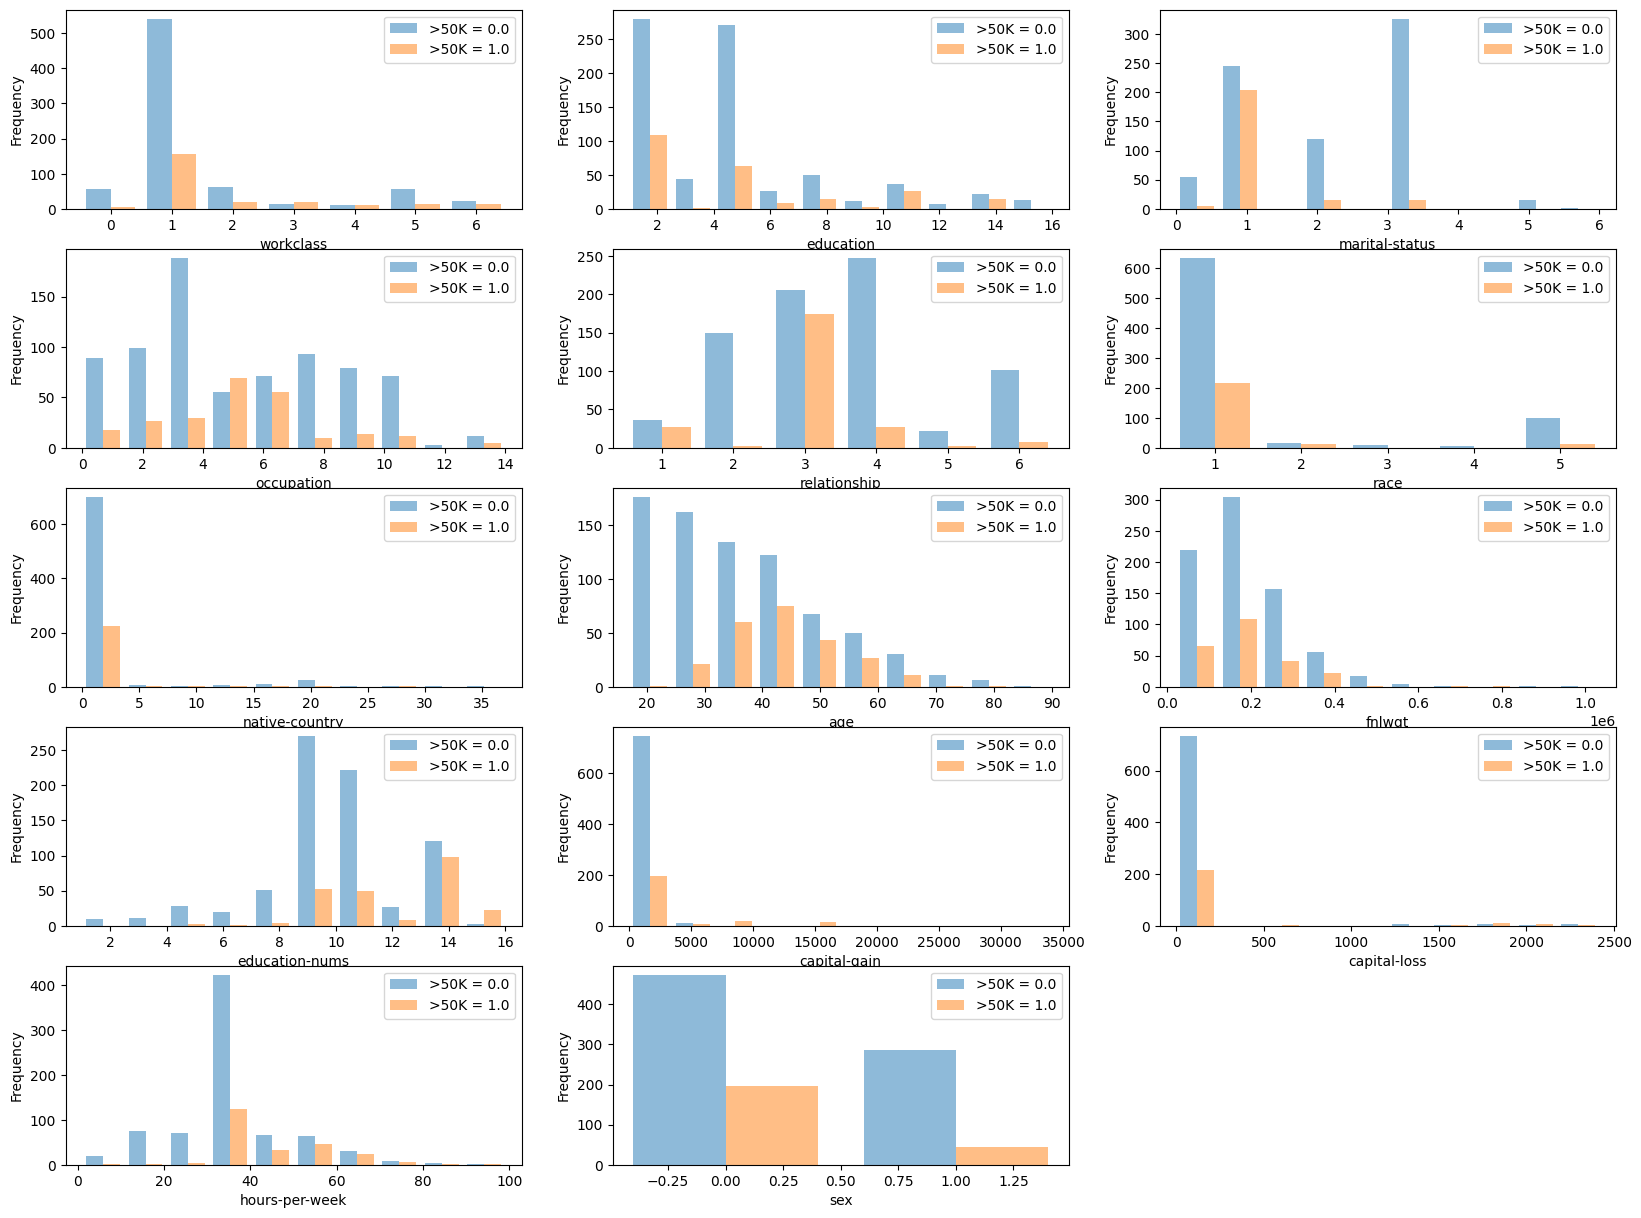

In [16]:
plt.figure()
#========================================
# part a: plot histograms of each feature
print('Plotting...')
plot_histograms (X, y, Xnames=Xnames, yname=yname)

In [17]:
#========================================
# train Majority Vote classifier on data
print('Classifying using Majority Vote...')
clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
clf.fit(X, y)                  # fit training data using the classifier
y_pred = clf.predict(X)        # take the classifier and run it on the training data
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

Classifying using Majority Vote...
	-- training error: 0.240


In [20]:
### ========== TODO : START ========== ###
# part b: evaluate training error of Random classifier
from sklearn.metrics import accuracy_score

random_clf = RandomClassifier()
random_clf.fit(X, y)
y_pred = random_clf.predict(X)
train_error = 1 - accuracy_score(y, y_pred)

print(f'Training error for Random Classifier: {train_error:.3f}')

### ========== TODO : END ========== ###

Training error for Random Classifier: 0.385


In [21]:
### ========== TODO : START ========== ###
# part c: evaluate training error of Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X, y)
y_pred = dt_clf.predict(X)
train_error = 1 - accuracy_score(y, y_pred)

print(f'Training error for Decision Tree Classifier: {train_error:.3f}')

### ========== TODO : END ========== ###

Training error for Decision Tree Classifier: 0.000


In [22]:
### ========== TODO : START ========== ###
# part d: evaluate training error of k-Nearest Neighbors classifier
# use k = 3, 5, 7 for n_neighbors
from sklearn.neighbors import KNeighborsClassifier

for k in [3, 5, 7]:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X, y)
    y_pred = knn_clf.predict(X)
    train_error = 1 - accuracy_score(y, y_pred)
    print(f'Training error for k-NN (k={k}): {train_error:.3f}')

### ========== TODO : END ========== ###

Training error for k-NN (k=3): 0.153
Training error for k-NN (k=5): 0.195
Training error for k-NN (k=7): 0.213


In [23]:
### ========== TODO : START ========== ###
# part e: evaluate training error of Logistic Regression
# use lambda_ = 0.1, 1, 10 for n_neighbors
from sklearn.linear_model import LogisticRegression

for lambda_val in [0.1, 1, 10]:
    C = 1 / lambda_val
    log_reg = LogisticRegression(C=C, random_state=0, max_iter=1000)
    log_reg.fit(X, y)
    y_pred = log_reg.predict(X)
    train_error = 1 - accuracy_score(y, y_pred)
    print(f'Training error for Logistic Regression (λ={lambda_val}): {train_error:.3f}')


Training error for Logistic Regression (λ=0.1): 0.208
Training error for Logistic Regression (λ=1): 0.208
Training error for Logistic Regression (λ=10): 0.213


In [30]:
### ========== TODO : START ========== ###
# part f: use cross-validation to compute average training and test error of classifiers
print('Investigating various classifiers...')

classifiers = {
    'Random': RandomClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(C=1, random_state=0, max_iter=1000)
}

for name, clf in classifiers.items():
    # Call the error function and store results
    train_error, test_error, f1 = error(clf, X, y)
    print(f"{name} - Training Error: {train_error:.3f}, Test Error: {test_error:.3f}, F1 Score: {f1:.3f}")

### ========== TODO : END ========== ###

Investigating various classifiers...


UnboundLocalError: local variable 'f1_score' referenced before assignment

Finding the best k...


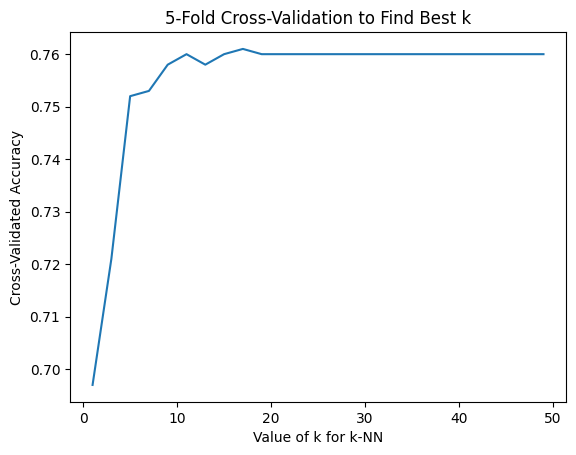

In [27]:
### ========== TODO : START ========== ###
# part g: use 5-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
print('Finding the best k...')

from sklearn.model_selection import cross_val_score

k_range = range(1, 51, 2)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    k_scores.append(scores.mean())

plt.figure()
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('5-Fold Cross-Validation to Find Best k')
plt.show()


### ========== TODO : END ========== ###

In [32]:
### ========== TODO : START ========== ###
# part h: investigate decision tree classifier with various depths
print('Investigating depths...')

depth_range = range(1, 21)
train_errors = []
test_errors = []

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    dt.fit(X_train, y_train)
    train_errors.append(1 - dt.score(X_train, y_train))
    test_errors.append(1 - dt.score(X_test, y_test))

# Plotting the results
plt.figure()
plt.plot(depth_range, train_errors, label='Training Error')
plt.plot(depth_range, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.legend()
plt.title('Decision Tree Depth Evaluation')
plt.show()

### ========== TODO : END ========== ###

Investigating depths...


NameError: name 'X_train' is not defined

In [33]:
print('Done')

Done
